In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def PCA(data, k=2):
    X = data
    X_mean = torch.mean(X,0)
    X = X - X_mean.expand_as(X)
    U,S,V = torch.svd(torch.t(X))
    return torch.mm(X,U[:,:k])

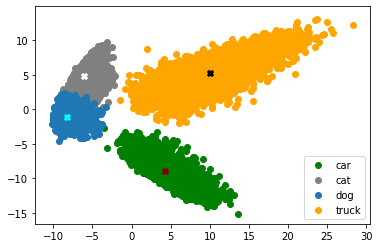

In [3]:
S = torch.load('../Hierarchical_Clustering/clusters2.pth')

l = [1,3,5,9]
lens = [4998, 4967, 4981, 4997]
output = torch.load("output.pth")


plt.scatter(output[:,0][:lens[0]], output[:,1][:lens[0]], color = 'green', label = 'car')
plt.scatter(output[:,0][lens[0]:lens[0]+lens[1]], output[:,1][lens[0]:lens[0]+lens[1]], color = 'gray', label = 'cat')
plt.scatter(output[:,0][lens[0]+lens[1]:lens[0]+lens[1]+lens[2]], output[:,1][lens[0]+lens[1]:lens[0]+lens[1]+lens[2]], label = 'dog')
plt.scatter(output[:,0][lens[0]+lens[1]+lens[2]:lens[0]+lens[1]+lens[2]+lens[3]], output[:,1][lens[0]+lens[1]+lens[2]:lens[0]+lens[1]+lens[2]+lens[3]], color = 'orange', label = 'truck')
plt.scatter(output[:,0][-4], output[:,1][-4], marker = 'X',color = 'maroon')
plt.scatter(output[:,0][-3], output[:,1][-3], marker = 'X',color = 'white')
plt.scatter(output[:,0][-2], output[:,1][-2], marker = 'X',color = 'cyan')
plt.scatter(output[:,0][-1], output[:,1][-1], marker = 'X',color = 'black')
    
plt.legend(loc=4)    
plt.show()

In [4]:
clusters = []
for i in range(10):
    clusters.append(torch.load("clustering_out"+str(i)+".pth"))
print(len(clusters))

10


In [5]:
label_names = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}

In [6]:
lens = []
for i in range(10):
    lens.append(clusters[i].shape[0])
print(lens)

[4957, 4935, 4955, 4944, 4936, 4970, 4945, 4950, 4952, 4956]


automobile truck


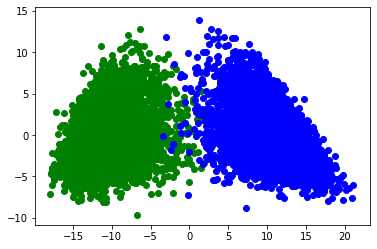

deer bird


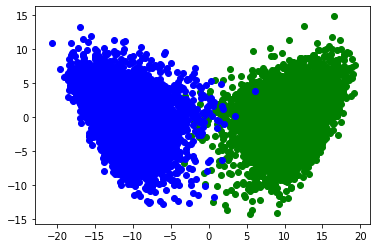

deer truck


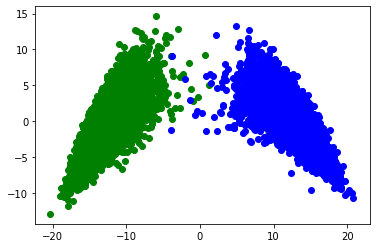

truck bird


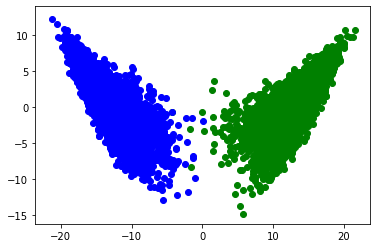

automobile bird


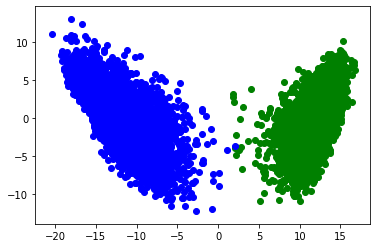

automobile deer


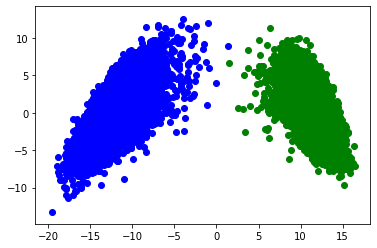

In [23]:
one = 1
two = 9
print(label_names[one], label_names[two])
x = np.array(PCA(torch.cat((clusters[one], clusters[two]))).cpu())
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'green', label = 'car')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'blue', label = 'car')
plt.show()

one = 4
two = 2
print(label_names[one], label_names[two])
x = np.array(PCA(torch.cat((clusters[one], clusters[two]))).cpu())
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'green', label = 'car')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'blue', label = 'car')
plt.show()

one = 4
two = 9
print(label_names[one], label_names[two])
x = np.array(PCA(torch.cat((clusters[one], clusters[two]))).cpu())
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'green', label = 'car')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'blue', label = 'car')
plt.show()

one = 9
two = 2
print(label_names[one], label_names[two])
x = np.array(PCA(torch.cat((clusters[one], clusters[two]))).cpu())
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'green', label = 'car')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'blue', label = 'car')
plt.show()

one = 1
two = 2
print(label_names[one], label_names[two])
x = np.array(PCA(torch.cat((clusters[one], clusters[two]))).cpu())
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'green', label = 'car')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'blue', label = 'car')
plt.show()

one = 1
two = 4
print(label_names[one], label_names[two])
x = np.array(PCA(torch.cat((clusters[one], clusters[two]))).cpu())
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'green', label = 'car')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'blue', label = 'car')
plt.show()

bird cat deer dog automobile truck


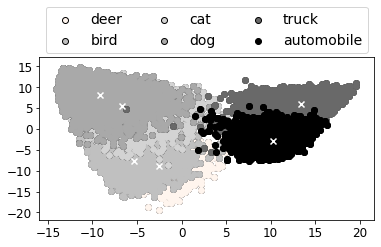

In [30]:
plt.figure(figsize=(6,3))
one = 2
two = 3
three = 4
four = 5
five = 1
six = 9
seven = 6
eight = 7 

c1 = torch.sum(clusters[one], dim = 0)/clusters[one].shape[0]
c2 = torch.sum(clusters[two], dim = 0)/clusters[two].shape[0]
c3 = torch.sum(clusters[three], dim = 0)/clusters[three].shape[0]
c4 = torch.sum(clusters[four], dim = 0)/clusters[four].shape[0]
c5 = torch.sum(clusters[five], dim = 0)/clusters[five].shape[0]
c6 = torch.sum(clusters[six], dim = 0)/clusters[six].shape[0]
c7 = torch.sum(clusters[seven], dim = 0)/clusters[seven].shape[0]
c8 = torch.sum(clusters[eight], dim = 0)/clusters[eight].shape[0]

print(label_names[one], label_names[two], label_names[three], label_names[four], label_names[five], label_names[six])
x = np.array(
                PCA(torch.cat((clusters[one], clusters[two], 
                               clusters[three], clusters[four],
                               clusters[five], clusters[six],
                               #clusters[seven], clusters[eight],
                               c1.reshape(1,-1), c2.reshape(1,-1), 
                               c3.reshape(1,-1), c4.reshape(1,-1),
                               c5.reshape(1,-1), c6.reshape(1,-1)
                               #c7.reshape(1,-1), c8.reshape(1,-1)
                              )
                             )).cpu()
            )
#plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]+lens[eight]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]+lens[eight]], color = 'silver', label = label_names[eight], edgecolors='black')
#plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]+lens[eight]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]+lens[eight]], color = 'silver')

#plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]], color = 'lightgrey', label = label_names[seven], edgecolor='black')
#plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]+lens[seven]], color = 'lightgrey')

plt.scatter(x[:,0][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], x[:,1][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], color = 'seashell', label = label_names[three], edgecolors = 'black')
plt.scatter(x[:,0][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], x[:,1][lens[one]+lens[two]:lens[one]+lens[two]+lens[three]], color = 'seashell')

plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'silver', label = label_names[one], edgecolors = 'black')
plt.scatter(x[:,0][:lens[one]], x[:,1][:lens[one]], color = 'silver')

plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'lightgrey', label = label_names[two], edgecolors = 'black')
plt.scatter(x[:,0][lens[one]:lens[one]+lens[two]], x[:,1][lens[one]:lens[one]+lens[two]], color = 'lightgrey')

plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], x[:,1][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], color = 'darkgray', label = label_names[four], edgecolors='black')
plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], x[:,1][lens[one]+lens[two]+lens[three]:lens[one]+lens[two]+lens[three]+lens[four]], color = 'darkgray')

plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], color = 'dimgray', label = label_names[six], edgecolors='black')
plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]+lens[five]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]+lens[six]], color = 'dimgray')

plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], color = 'black', label = label_names[five], edgecolors='black')
plt.scatter(x[:,0][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], x[:,1][lens[one]+lens[two]+lens[three]+lens[four]:lens[one]+lens[two]+lens[three]+lens[four]+lens[five]], color = 'black')


plt.scatter(x[:,0][-6], x[:,1][-6], color = 'white', marker = 'x')
plt.scatter(x[:,0][-5], x[:,1][-5], color = 'white', marker = 'x')
plt.scatter(x[:,0][-4], x[:,1][-4], color = 'white', marker = 'x')
plt.scatter(x[:,0][-3], x[:,1][-3], color = 'white', marker = 'x')
plt.scatter(x[:,0][-2], x[:,1][-2], color = 'white', marker = 'x')
plt.scatter(x[:,0][-1], x[:,1][-1], color = 'white', marker = 'x')
#plt.scatter(x[:,0][-2], x[:,1][-2], color = 'white', marker = 'x')
#plt.scatter(x[:,0][-1], x[:,1][-1], color = 'white', marker = 'x')

plt.legend(loc="upper center", ncol = 3, bbox_to_anchor=(0.5, 1.35), fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.show()
plt.savefig('clusters.pdf', bbox_inches="tight", dpi=100)

In [8]:
clusters[one].shape

torch.Size([4955, 512])

In [9]:
acc = 0
count = 0

x = PCA(torch.cat((
            (torch.sum(clusters[0], dim = 0)/clusters[0].shape[0]).reshape(1,-1),
            (torch.sum(clusters[1], dim = 0)/clusters[1].shape[0]).reshape(1,-1),
            (torch.sum(clusters[2], dim = 0)/clusters[2].shape[0]).reshape(1,-1),
            (torch.sum(clusters[3], dim = 0)/clusters[3].shape[0]).reshape(1,-1),
            (torch.sum(clusters[4], dim = 0)/clusters[4].shape[0]).reshape(1,-1),
            (torch.sum(clusters[5], dim = 0)/clusters[5].shape[0]).reshape(1,-1),
            (torch.sum(clusters[6], dim = 0)/clusters[6].shape[0]).reshape(1,-1),
            (torch.sum(clusters[7], dim = 0)/clusters[7].shape[0]).reshape(1,-1),
            (torch.sum(clusters[8], dim = 0)/clusters[8].shape[0]).reshape(1,-1),
            (torch.sum(clusters[9], dim = 0)/clusters[9].shape[0]).reshape(1,-1),
    )))

table = []
for i in range(10):
    for j in range(i+1,10):
        c1 = x[i]
        c2 = x[j]
        table.append([label_names[i], label_names[j], torch.pow(torch.pow(c2 - c1, 2).sum(), 0.5)])

        
for row in table:
    print("{: >20} {: >20} {: >20}".format(*row))

            airplane           automobile    6.623347282409668
            airplane                 bird   10.238031387329102
            airplane                  cat    14.62533950805664
            airplane                 deer    8.373849868774414
            airplane                  dog   15.187637329101562
            airplane                 frog    14.03293514251709
            airplane                horse   7.0766448974609375
            airplane                 ship   15.590232849121094
            airplane                truck    7.507845401763916
          automobile                 bird   15.800493240356445
          automobile                  cat   17.232507705688477
          automobile                 deer   14.704452514648438
          automobile                  dog   18.347965240478516
          automobile                 frog   15.403305053710938
          automobile                horse   13.699975967407227
          automobile                 ship    10.4263811

In [14]:
S = torch.cat((
            (torch.sum(clusters[0], dim = 0)/clusters[0].shape[0]).reshape(1,-1),
            (torch.sum(clusters[1], dim = 0)/clusters[1].shape[0]).reshape(1,-1),
            (torch.sum(clusters[2], dim = 0)/clusters[2].shape[0]).reshape(1,-1),
            (torch.sum(clusters[3], dim = 0)/clusters[3].shape[0]).reshape(1,-1),
            (torch.sum(clusters[4], dim = 0)/clusters[4].shape[0]).reshape(1,-1),
            (torch.sum(clusters[5], dim = 0)/clusters[5].shape[0]).reshape(1,-1),
            (torch.sum(clusters[6], dim = 0)/clusters[6].shape[0]).reshape(1,-1),
            (torch.sum(clusters[7], dim = 0)/clusters[7].shape[0]).reshape(1,-1),
            (torch.sum(clusters[8], dim = 0)/clusters[8].shape[0]).reshape(1,-1),
            (torch.sum(clusters[9], dim = 0)/clusters[9].shape[0]).reshape(1,-1)))

print(S.shape)

torch.Size([10, 512])


In [10]:

multiplies = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
skip = []
while(S.shape[0] - len(skip) > 1):
    min_dist = 99999999999999999
    merge1 = -1
    merge2 = -1
    for i in range(S.shape[0]):
        if i not in skip:
            for j in range(i+1, S.shape[0]):
                if j not in skip:
                    dist = ((S[i] - S[j])*(S[i] - S[j])).sum().item()
                    if dist < min_dist:
                        min_dist = dist
                        merge1 = i
                        merge2 = j

    skip.append(merge1)
    skip.append(merge2)
    merged = (S[merge1]+S[merge2])/2
    print('SG'+str(int(len(skip)/2)), multiplies[merge1], multiplies[merge2], min_dist)
    multiplies.append('SG'+str(int(len(skip)/2)))
    S = torch.cat((S, merged.reshape((1,512))), 0)

SG1 bird dog 154.11370849609375


RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 2 and 3 at /pytorch/aten/src/THC/generic/THCTensorMath.cu:74